In [73]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline  


In [74]:
days = 30

In [123]:
mu_control, sigma_control, n_control = 100, 5, 100
mu_experiment, sigma_experiment, n_experiment = 100, 5, 100

In [124]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [125]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    #print(user_data.head())
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value, 
                          user_data[user_data.group == 'control'].value)

    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1


C:\Temp\ipykernel_14108\3257773315.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_data = user_data.append(day_data_experiment).append(day_data_control)
C:\Temp\ipykernel_14108\3257773315.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
C:\Temp\ipykernel_14108\3257773315.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = daily_data.append(current_data_stat)
C:\Temp\ipykernel_14108\3257773315.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_data = user_data.append(day_data_experiment).append(day_data_

In [126]:
daily_data.head(10)

,group,value,date
0,control,99.368060,1
1,experiment,100.554967,1
0,control,99.624695,2
1,experiment,100.369891,2
0,control,99.886037,3
1,experiment,99.969441,3
0,control,99.727938,4
1,experiment,100.007502,4
0,control,99.952633,5
1,experiment,100.089820,5


In [127]:
daily_data = daily_data.reset_index(drop=True)

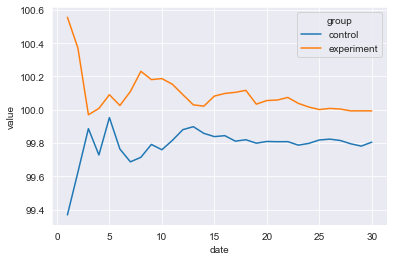

In [128]:
ax = sns.lineplot(data=daily_data, x="date", y="value", hue='group')

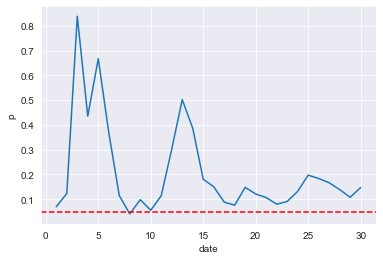

In [129]:
ax = sns.lineplot(data=stat_result.reset_index(drop=True), x="date", y="p")
ax.axhline(0.05, ls='--', color='red')

In [130]:
MDE

NameError: name 'MDE' is not defined